<a href="https://colab.research.google.com/github/anna985/pml-1/blob/master/course/Problem028_MLReady/028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic Datset
## Predict passenger's survival in titanic accident, given the passenger attributes.

In [1]:
from sklearn.datasets import fetch_openml
d  = fetch_openml(name="Titanic", as_frame=True, version=1)
df = d["frame"]
print(d['DESCR'])
# df.head(5)

**Author**: Frank E. Harrell Jr., Thomas Cason  
**Source**: [Vanderbilt Biostatistics](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html)  
**Please cite**:   

The original Titanic dataset, describing the survival status of individual passengers on the Titanic. The titanic data does not contain information from the crew, but it does contain actual ages of half of the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

Thomas Cason of UVa has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created the dataset here. Some duplicate passengers have been dropped, many errors corrected, many missing ages filled in, and new variable

In [2]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


Features description

* pclass    Class (1 = First, 2 = Second, 3 = Third)
* survived  (0 = died, 1 = survived)
* name
* sex
* age
* sibsp (Number of siblings/spouses on board)
* parch (Number of parents/children on board)
* ticket (Ticket Number)
* fare  (Price of the ticket)
* cabin (Cabin Number)
* embarked (Place where passeneger embarked C = Cherbourg; Q = Queenstown; S = Southampton)
* boat (Lifeboat ID if passenger was rescued)
* body (Body ID if passenger died and body was recovered)
* home.dest (Passenger Hometown)

Types of features 
* Categorical (Number or Text)
    * Ordinal
    * Nominal
* Numerical
* Text
    
TBD: What is the type for following features. (choose from above)
* name
* sex
* age
* ticket
* embarked (port of embarkment)
* survived
* parch (number of parents/children aboard)



In [ ]:
# Missing Data
## TBD Which features in Titanic dataset have missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.7+ KB


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1298,3.0,0,"Wittevrongel, Mr. Camille",male,36.0,0.0,0.0,345771,9.5000,None,S,None,NaN,None
907,3.0,0,"Jussila, Miss. Katriina",female,20.0,1.0,0.0,4136,9.8250,None,S,None,NaN,None
84,1.0,0,"Cumings, Mr. John Bradley",male,39.0,1.0,0.0,PC 17599,71.2833,C85,C,None,NaN,"New York, NY"
1127,3.0,0,"Petroff, Mr. Nedelio",male,19.0,0.0,0.0,349212,7.8958,None,S,None,NaN,None
630,3.0,1,"Andersson, Mr. August Edvard ('Wennerstrom')",male,27.0,0.0,0.0,350043,7.7958,None,S,A,NaN,None
895,3.0,1,"Johnson, Miss. Eleanor Ileen",female,1.0,1.0,1.0,347742,11.1333,None,S,15,NaN,None
799,3.0,0,"Fischer, Mr. Eberhard Thelander",male,18.0,0.0,0.0,350036,7.7958,None,S,None,NaN,None
904,3.0,0,"Jonkoff, Mr. Lalio",male,23.0,0.0,0.0,349204,7.8958,None,S,None,NaN,None
942,3.0,0,"Lahoud, Mr. Sarkis",male,NaN,0.0,0.0,2624,7.2250,None,C,None,NaN,None
477,2.0,0,"Lamb, Mr. John Joseph",male,NaN,0.0,0.0,240261,10.7083,None,Q,None,NaN,None


## ML Ready: Is data ready to be fed to a classification problem?
## TBD: What are 3 main issues that needs to be resolved in data?

In [4]:
import pandas as pd

def cleaner(df):
  for col_name in df.columns:    
      if df[col_name].dtype.name == 'category': 
        # Convert categorical types
        df[col_name] = df[col_name].cat.codes
      if df[col_name].dtype.name == 'object':
        df = df.drop(columns=[col_name])
  return df

def titanic_cleaner(df):
    df = df.drop(columns = ['body']) 
    return df.dropna()

#TBD Using above 2 naive cleaner functions clean the titanic dataframe 
df = titanic_cleaner(cleaner(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   float64
 1   survived  1045 non-null   int8   
 2   sex       1045 non-null   int8   
 3   age       1045 non-null   float64
 4   sibsp     1045 non-null   float64
 5   parch     1045 non-null   float64
 6   fare      1045 non-null   float64
 7   embarked  1045 non-null   int8   
dtypes: float64(5), int8(3)
memory usage: 52.0 KB


## TBD Split the data into train test (test_size=0.25, random_state=101)

In [5]:
from sklearn.model_selection import train_test_split
Y = df['survived']
X = df.drop('survived', axis=1)

X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1045 non-null   float64
 1   sex       1045 non-null   int8   
 2   age       1045 non-null   float64
 3   sibsp     1045 non-null   float64
 4   parch     1045 non-null   float64
 5   fare      1045 non-null   float64
 6   embarked  1045 non-null   int8   
dtypes: float64(5), int8(2)
memory usage: 51.0 KB


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

## TBD Apply Logistic Regression 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.6870229007633588

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.8015267175572519

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.7519083969465649

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.7938931297709924

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.8053435114503816

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.8015267175572519

In [17]:
import numpy as np
from matplotlib import pyplot

np.around(model.coef_, decimals=2)

df.columns

Index(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

<BarContainer object of 7 artists>

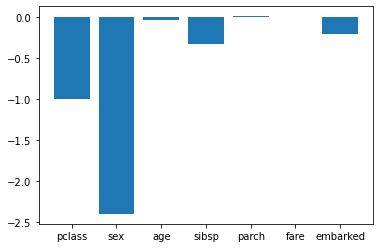

In [19]:
pyplot.bar(X.columns, model.coef_.reshape(-1,))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)
#TBD Accuracy Score on test set
accuracy_score(Y_test, Y_hat)

0.767175572519084

<BarContainer object of 7 artists>

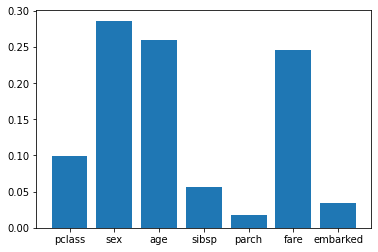

In [22]:
import numpy as np
from matplotlib import pyplot

imp = model.feature_importances_

pyplot.bar(X.columns, imp)

## What are the top 3 most important features for predicting survival?
